In [3]:
# Import libary and dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
# Read the data
file_path=('cleaned_data.csv')
data=pd.read_csv(file_path, index_col = 0)
data.head()

,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,A,98001,Auburn,725000,4,3,0.00,3060,5/26/2021,0.227,9894,68
1,A,98001,Auburn,300000,4,2,1.00,920,5/26/2021,0.164,7150,68
2,S,98001,Auburn,555000,3,2,1.00,1196,5/7/2021,0.544,23689,68
3,A,98001,Auburn,1300000,220,4,1.75,2850,10/22/2020,6.000,261360,68
4,S,98001,Auburn,250000,46,2,1.50,1200,5/20/2021,0.220,9600,68


In [5]:
data = data.drop(columns=["Date","Status","ZipCode","City","Acres","Days_on_market"])
data.head()

,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,725000,3,0.00,3060,9894,68
1,300000,2,1.00,920,7150,68
2,555000,2,1.00,1196,23689,68
3,1300000,4,1.75,2850,261360,68
4,250000,2,1.50,1200,9600,68


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4187
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4128 non-null   int64  
 1   Beds       4128 non-null   int64  
 2   Baths      4128 non-null   float64
 3   Sqft       4128 non-null   int64  
 4   Lot_sqft   4128 non-null   int64  
 5   Liv_index  4128 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 225.8 KB


In [7]:
print(data['Price'].describe().apply(lambda x: '{:,.1f}'.format(x)))

count         4,128.0
mean      1,171,752.0
std       1,229,190.1
min         139,000.0
25%         659,990.0
50%         868,222.5
75%       1,299,237.5
max      27,500,000.0
Name: Price, dtype: object


C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\

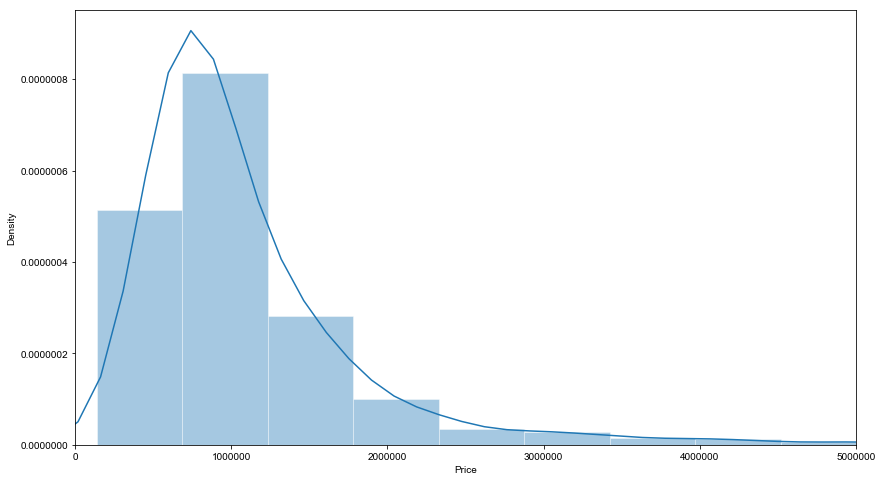

In [8]:
# Sale Price Distribution
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")
sns.distplot(data['Price'])
plt.xlim(0,5000000)
plt.show()

In [9]:
data['Price'].mean()

1171752.0479651163

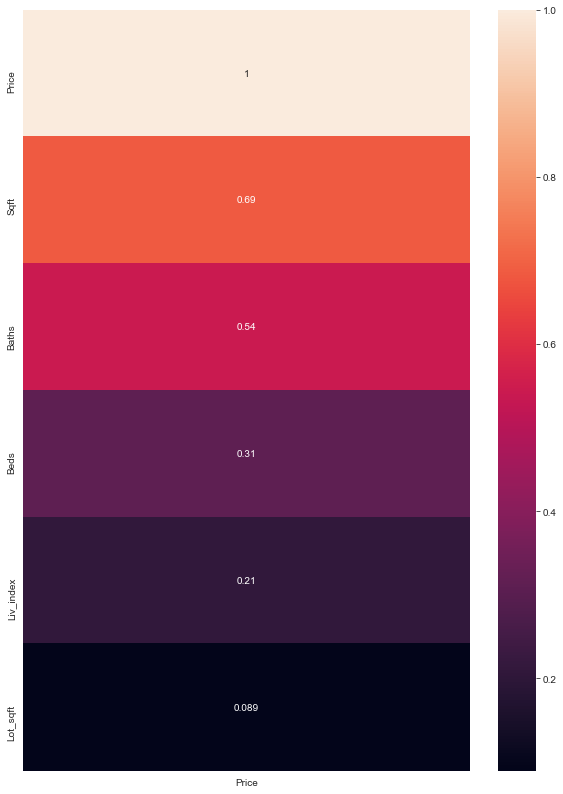

In [10]:
# Correlation to price value using heatmap
fig, ax = plt.subplots(figsize=(10,14))
price_corr = data.corr()[['Price']].sort_values(
  by='Price', ascending=False)
sns.heatmap(price_corr, annot=True, ax=ax) 

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

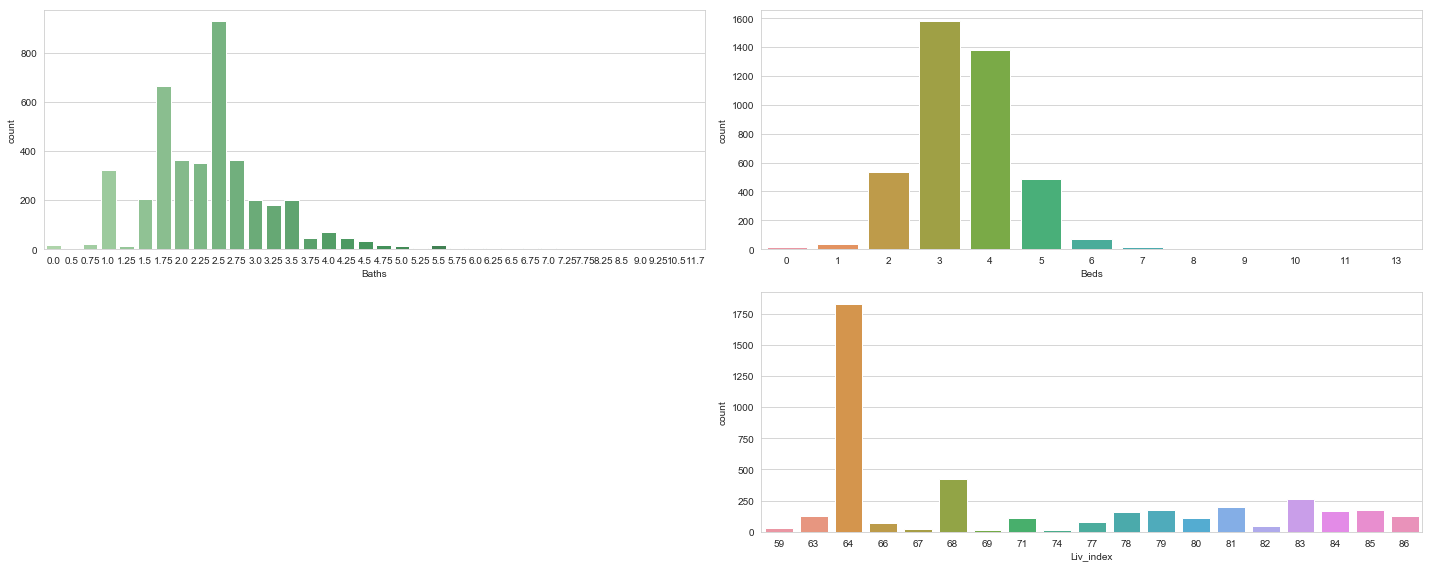

In [11]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(20,8),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(data['Baths'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(data['Beds'])
fig.add_subplot(2,2,4)
sns.countplot(data['Liv_index'])
plt.tight_layout()

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


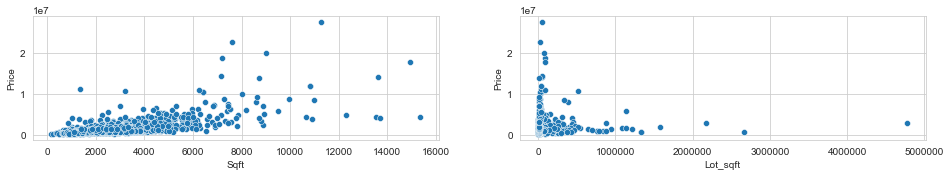

In [12]:
# sqft liveing and price scatter plot
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['Sqft'], data['Price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['Lot_sqft'],data['Price'])




## Machine Learning

In [39]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Creating a Neural Network Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [40]:
# Define the features X set and the target y vector
X = data.drop('Price',axis =1).values
y = data['Price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [56]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics =['mae'])

In [59]:
history = model.fit(X_train_scaled, y_train, validation_split=.33, epochs =100)

Epoch 1/100
58/58 [==============================] - 1s 4ms/step - loss: 3036760937350.5083 - mae: 1225213.0318 - val_loss: 2919215398912.0000 - val_mae: 1146092.2500
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 3108963752456.6777 - mae: 1190644.5011 - val_loss: 2919172407296.0000 - val_mae: 1146076.1250
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 2450810483729.3560 - mae: 1167632.4237 - val_loss: 2918977372160.0000 - val_mae: 1146010.3750
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 2894464133432.4067 - mae: 1209608.1102 - val_loss: 2918430539776.0000 - val_mae: 1145829.7500
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 2577342234068.6104 - mae: 1161127.5636 - val_loss: 2917187715072.0000 - val_mae: 1145428.3750
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 2532770418479.7290 - mae: 1180985.8400 - val_loss: 2914780446720.0000 - val_mae: 1144663.250

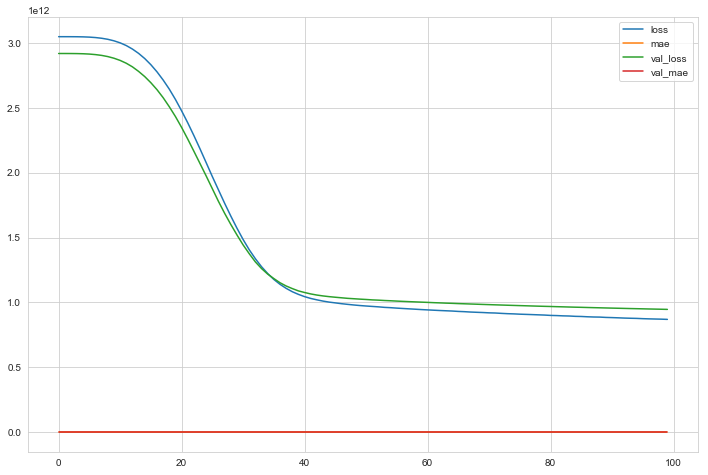

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [63]:
y_pred_nn = model.predict(X_test_scaled)

In [66]:
df2 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_nn.ravel()})
df2 = df.head(5)
df2

,Actual,Predicted
0,1250000,1.999642e+06
1,750000,1.108105e+06
2,2160000,2.286012e+06
3,920000,1.399684e+06
4,500000,1.084565e+06


In [65]:
predictions = model.predict(X_test_scaled[0:5])
print("prdicted value are:",predictions)
print("Real values are:", y_test[:5])

prdicted value are: [[1201526.2 ]
 [ 801533.56]
 [1793800.2 ]
 [1152875.2 ]
 [ 678116.25]]
Real values are: [1250000  750000 2160000  920000  500000]


In [55]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print("mean squared error from neural net:",mse_neural)
print("mean absoulte error from neural net:",mae_neural)

43/43 [==============================] - 0s 738us/step - loss: 789340684288.0000 - mae: 441105.1250
mean squared error from neural net: 789340684288.0
mean absoulte error from neural net: 441105.125


## Method1 : Linear Regression

In [83]:
#Liner Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train_scaled,y_train)
mse_lr=mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
print("mean squared error from linear regression:",mse_neural)
print("mean absoulte error from linear regression:",mae_neural)

mean squared error from linear regression: 789340684288.0
mean absoulte error from linear regression: 441105.125


In [33]:
regressor.intercept_

-138722.5041624317

In [34]:
y_pred_lr = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df1 = df.head(10)
df1

,Actual,Predicted
0,1250000,1.999642e+06
1,750000,1.108105e+06
2,2160000,2.286012e+06
3,920000,1.399684e+06
4,500000,1.084565e+06
5,1007000,7.549936e+05
6,525000,3.948510e+05
7,950000,1.692402e+06
8,1417675,1.355989e+06
9,675000,8.170328e+05


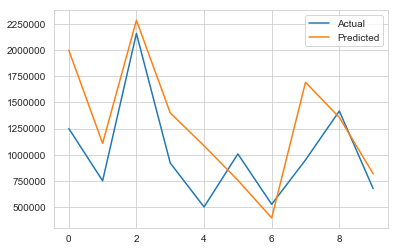

In [35]:
df1.plot()

In [36]:
from sklearn import metrics

print("Train Accuracy Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Accuracy Score {:.2f}".format(regressor.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_lr))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_lr)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))


Train Accuracy Score 0.50
Test Accuracy Score 0.50
Mean Absolute Error: 420131.53
Mean Squared Error:663699870255.73
Root Mean Squared Error:814677.77


## Method2: Neural Network

In [37]:
# Creating a Neural Network Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [38]:
# having 5 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [56]:
#Training model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=100,callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
22/22 [==============================] - 1s 9ms/step - loss: 2872995969647.3042 - val_loss: 2635020369920.0000
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 3002189941537.3911 - val_loss: 2635018272768.0000
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 2740009794159.3042 - val_loss: 2635013816320.0000
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 2643794916574.6089 - val_loss: 2635003854848.0000
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 2716158873065.7393 - val_loss: 2634984456192.0000
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 3027751899314.0869 - val_loss: 2634946445312.0000
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 3105958737830.9565 - val_loss: 2634880909312.0000
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 2928371872278.2607 - val_loss: 2634775003136.0000
Epoch 9/100
22/2

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 19)                114       
_________________________________________________________________
dense_21 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_22 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 20        
Total params: 894
Trainable params: 894
Non-trainable params: 0
_________________________________________________________________


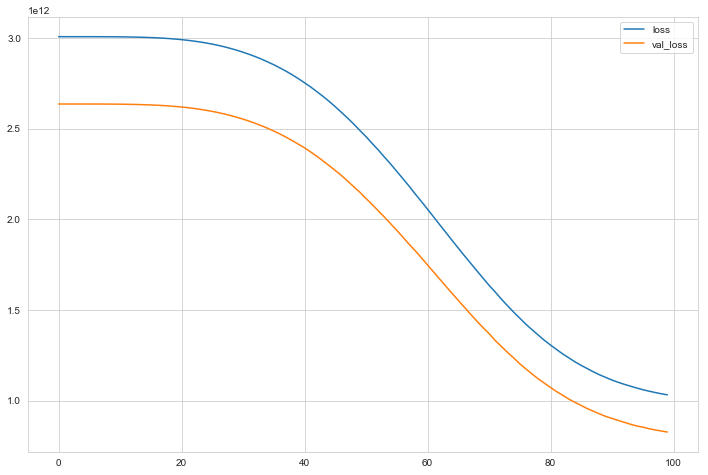

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [61]:
y_pred_nn = model.predict(X_test)

In [62]:
df2 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_nn.ravel()})
df2 = df.head(10)
df2

,Actual,Predicted
0,1250000,1.999642e+06
1,750000,1.108105e+06
2,2160000,2.286012e+06
3,920000,1.399684e+06
4,500000,1.084565e+06
5,1007000,7.549936e+05
6,525000,3.948510e+05
7,950000,1.692402e+06
8,1417675,1.355989e+06
9,675000,8.170328e+05


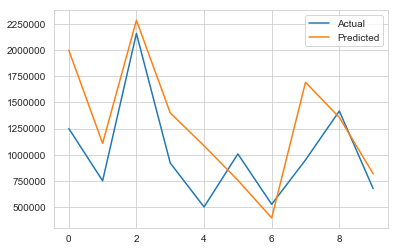

In [63]:
df2.plot()

In [64]:
y_pred_nn = model.predict(X_test)
from sklearn import metrics

print("Train Accuracy Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Accuracy Score {:.2f}".format(regressor.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_nn)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_nn)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))))


Train Accuracy Score 0.50
Test Accuracy Score 0.50
Mean Absolute Error: 439639.57
Mean Squared Error: 827294676296.70
Root Mean Squared Error: 909557.41


## Method3: Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)

regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=0)

In [67]:
y_pred_forest = regressor.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
df3 = df.head(10)
df3

,Actual,Predicted
0,1250000,1.999642e+06
1,750000,1.108105e+06
2,2160000,2.286012e+06
3,920000,1.399684e+06
4,500000,1.084565e+06
5,1007000,7.549936e+05
6,525000,3.948510e+05
7,950000,1.692402e+06
8,1417675,1.355989e+06
9,675000,8.170328e+05


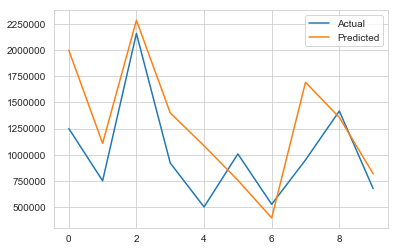

In [68]:
df3.plot()

In [69]:
y_pred_forest = model.predict(X_test)
from sklearn import metrics

print("Train Accuracy Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Accuracy Score {:.2f}".format(regressor.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_forest)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_forest)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))))


Train Accuracy Score 0.93
Test Accuracy Score 0.58
Mean Absolute Error: 439639.57
Mean Squared Error: 827294676296.70
Root Mean Squared Error: 909557.41


In [70]:
print('Model: Linear Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_lr)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))
print('*********************************\n')
print('Model: Neural Network\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_nn))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_nn)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))))
print('*********************************\n')
print('Model: Random Forest\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_forest))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_forest)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))))


Model: Linear Regression

Mean Absolute Error(MAE): 420131.53
Mean Squared Error(MSE): 663699870255.79
Root Mean Squared Error(RMSE): 814677.77
*********************************

Model: Neural Network

Mean Absolute Error(MAE): 439639.57
Mean Squared Error(MSE):827294676296.70
Root Mean Squared Error(RMSE):909557.41
*********************************

Model: Random Forest

Mean Absolute Error(MAE): 439639.57
Mean Squared Error(MSE):827294676296.70
Root Mean Squared Error(RMSE):909557.41
